### KDT
#### 1. Python 데이터분석: 예측모델 개발

- 강사: 최가람, 천재교육 AI센터 데이터기획분석팀원
- 주요 업무: 이탈 예측, 추천 (도서, 콘텐츠) 모델 개발 및 운영, 데이터 분석 업무

- 일정: 2023.8.07 ~ 8.08
<p>

- 교육내용
    - <b>이탈 예측 모델 개념 및 활용 데이터 설명</b>
    - <b>데이터 전처리 모듈 개발</b>
    - <b>분석 모델링 개발 실습 1 (Logistic Regression, LGBM)</b>
    - <b>분석 모델링 개발 실습 2 (Logistic Regression, LGBM)</b>
    - <b>성능 지표 개념 (Confusion Matrix)</b>
    - 모델 성능 결과 분석
    - 모델 최적화
<p>

- 교육목표
    - 온라인 교육 서비스를 이용하고 있는 유저들의 이력을 바탕으로 이탈 여부를 예측할 수 있는 모델을 개발해보자
    - 통합학년 이탈 예측 모델 구성
    - 학년 별 이탈 예측 모델 구성
    - 구매/재구매 별 이탈 예측 모델 구성
    - 과제) 이탈 예측 모델 개발: 활용 데이터 간략 설명, 예측 모델(logistic, DCT, Xgboost, LGBM 등등) 구성, ** 성능 지표를 통한 결과 설명 **

#### 2. 이탈예측 데이터 분석

In [3]:
# 데이터 읽어 오기
# 파일명: churn_data.csv
import pandas as pd
churn_data = pd.read_csv('./data/churn_data.csv')

In [12]:
# 데이터 기본 확인 (전체 레코드 수, 컬럼명 등)
churn_data.head()
churn_data.columns
# 전체 길이 살펴보기 -> 60000개의 user에 대한 데이터라는 걸 확인 !
len(churn_data)
# rows -> 1rows -> user 1명
# 결측치
churn_data = churn_data.fillna(0)
print(churn_data)

# 필요 없는 컬럼 제거 -> number
# churn_data = churn_data.drop(columns= ['number'])
churn_data.head()

                                  system_id grade_sect_cd mbr_sex_cd  \
0      87ee0282-ece5-4491-bb07-be93854750ac          G011          M   
1      8817ada1-b7ad-4713-b041-ee180540cb87          G011          M   
2      884cddf4-bda5-4d81-960c-b9a4892645f0          G011          F   
3      8a58832b-592b-4b33-b05e-0e11422d73d5          G011          M   
4      8af8f516-a9f0-4b6a-a27f-fc77ba51f708          G011          M   
...                                     ...           ...        ...   
59995  3d97d2c6-50dd-4c12-9fee-01578d691b0d          G016          F   
59996  41258431-f36d-46e7-a0d4-43f98edafd21          G016          M   
59997  4157bf9d-92ea-4656-a2f6-9ac53ced8328          G016          F   
59998  416c8ba3-330b-45fc-aae8-91b548c28b3d          G016          M   
59999  423b5121-b5e9-4a2c-ab53-2c06c21baf62          G016          M   

       tmon_pchrg_lrn_dcnt  acmlt_pchrg_lrn_dcnt  acmlt_bilclct_amt  \
0                     31.0                 247.0           95200

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False


컬럼 설명

- system_id	: system 상 id
- grade_sect_cd	: 학년 (1~6학년)
- mbr_sex_cd : 성별
- tmon_pchrg_lrn_dcnt : 당월 유료 학습 일 수
- acmlt_pchrg_lrn_dcnt : 누적 유료 학습 일 수 (성숙도)
- acmlt_bilclct_amt	: 누적 수금액
- correct_rate_avg	: 당월 획득 점수 평균
- learning_time_avg	: 당월 학습 시간 평균
- media_action_cnt_sum : 미디어 콘텐츠 내 동영상 행동 횟수 (총합)
- non_video_viewed_cnt_sum : 미디어 콘텐츠 미시청 행동 횟수 (총합)
- get_mm_point_sum : 당월 획득 포인트 합 (사용 x)
- label	: 이탈, 미이탈 여부 (0 - 미이탈, 1 - 이탈)
- re_purch : 신규, 재구매 여부 (False - 신규, True - 재구매)

In [17]:
# 컬럼 별 값 확인 (범주형)
# 학년, 성별, label, re_purch
churn_data.nunique()
churn_data['grade_sect_cd'].unique()
churn_data['mbr_sex_cd'].unique()
churn_data['label'].unique()
churn_data['re_purch'].unique()

array([False,  True])

In [19]:
# 컬럼 별 값 확인 (수치형)
churn_data.describe()

,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label
count,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,27.335317,355.340267,1.251115e+06,0.717041,410.660642,620.859917,237.936550,2830.626967,0.015533
std,8.584667,225.370258,7.912310e+05,0.203345,373.773580,737.375004,153.297371,2435.607888,0.123662
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,169.000000,5.950000e+05,0.650000,236.735000,326.000000,157.000000,1017.000000,0.000000
50%,31.000000,344.000000,1.199000e+06,0.760000,340.335000,501.000000,229.000000,2145.000000,0.000000
75%,31.000000,532.000000,1.817000e+06,0.850000,492.200000,744.000000,301.000000,4472.000000,0.000000
max,31.000000,730.000000,2.616000e+06,1.000000,42755.000000,45609.000000,6509.000000,66552.000000,1.000000


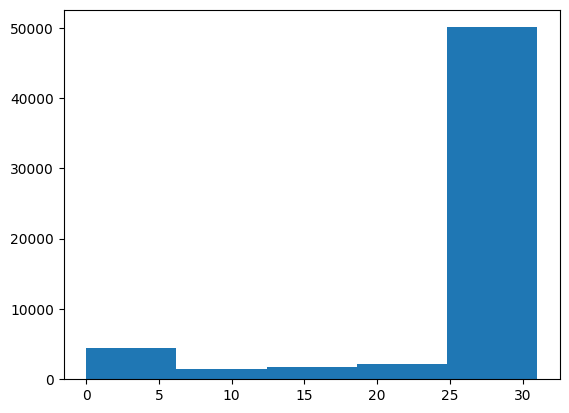

In [20]:
# 전반적인 분포도 확인
import matplotlib.pyplot as plt

# 당월 유료학습일 수 :
plt.hist(churn_data['tmon_pchrg_lrn_dcnt'], bins=5)
plt.show()

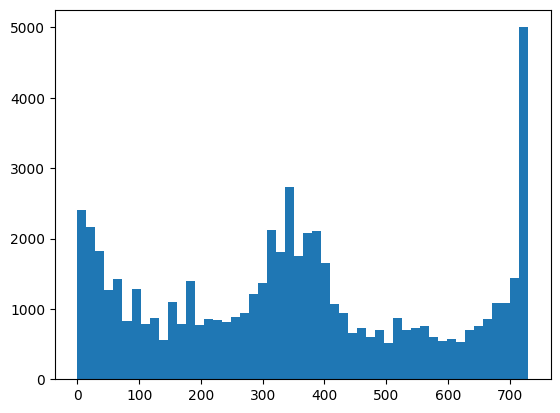

In [21]:
# 누적 유료학습일 수 
plt.hist(churn_data['acmlt_pchrg_lrn_dcnt'], bins=50)
plt.show()

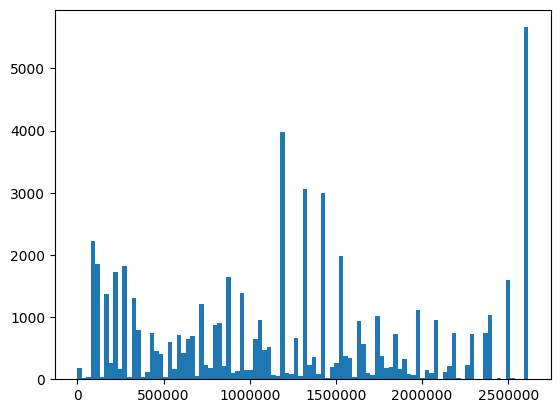

In [24]:
# 누적 수금액
acm_bil = churn_data['acmlt_bilclct_amt'].apply(lambda x: int(float(x)))
plt.hist(acm_bil, bins=100)
plt.ticklabel_format(axis='x', style='plain', useOffset=False)
plt.show()

#### 3. 이탈예측 모델

[데이터 - 컨셉]
- 결과 : 이탈 or 미이탈
- 학년 이력 : 전체 학년 통합 or 학년 별 분리
- 구매, 재구매 이력: Feature 사용 or 모델 분리
- 성별 이력 등등..

[모델]
- 데이터 처리 : DB 사용 -> SQL 처리
- 모델 구현 (Logistic Regression, LGBM)
- 실행부
- 최적화 (Optimizing)

##### 3-1 데이터 전처리

In [30]:
# 데이터 읽어오기
churn_df = pd.read_csv('./data/churn_data.csv')
churn_df = churn_df.fillna(0)
churn_df = churn_df.drop(columns= ['number'])

In [38]:
# 학습 데이터, 레이블 (label) 분리
# 데이터 읽어오기
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_df['grade'] = churn_df['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn_df.head()

# 필요 컬럼만 가져오기 (X : 학습 데이터, y: 레이블)

# - grade_sect_cd	: 학년 (1~6학년)
# - tmon_pchrg_lrn_dcnt : 당월 유료 학습 일 수
# - acmlt_pchrg_lrn_dcnt : 누적 유료 학습 일 수 (성숙도)
# - acmlt_bilclct_amt	: 누적 수금액
# - correct_rate_avg	: 당월 획득 점수 평균
# - learning_time_avg	: 당월 학습 시간 평균
# - media_action_cnt_sum : 미디어 콘텐츠 내 동영상 행동 횟수 (총합)
# - non_video_viewed_cnt_sum : 미디어 콘텐츠 미시청 행동 횟수 (총합)
# - get_mm_point_sum : 당월 획득 포인트 합 (사용 x)

X = churn_df[['grade', 
'tmon_pchrg_lrn_dcnt', 
'acmlt_pchrg_lrn_dcnt', 
'acmlt_bilclct_amt', 
'correct_rate_avg',
'learning_time_avg',
'media_action_cnt_sum', 
'non_video_viewed_cnt_sum',
'get_mm_point_sum']]

y = churn_df['label']

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: label, Length: 60000, dtype: int64

In [40]:
# Train, Test 데이터 분리 (이탈 미이탈 값 확인)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("[Train] 전체 : {}, 이탈 : {}, 미이탈 : {}".format(len(X_train), y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
print("[Test] 전체 : {}, 이탈 : {}, 미이탈 : {}".format(len(X_test), y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

[Train] 전체 : 48000, 이탈 : 746, 미이탈 : 47254
[Test] 전체 : 12000, 이탈 : 186, 미이탈 : 11814


##### 3-2 Logistic regression 모델

In [44]:
from sklearn.linear_model import LogisticRegression
# Logistic 모델 학습
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [46]:
# 예측 및 결과
y_pred = log_model.predict(X_test)
y_pred = list(y_pred)
print("[Predict] 이탈: {}, 미이탈: {}".format(y_pred.count(1), y_pred.count(0)))
# y_test : 결과 값 (실제 값)

[Predict] 이탈: 52, 미이탈: 11948


In [ ]:
# 예측 데이터와 실제 데이터의 차이 살펴보기 (True or False)
# [Test] 이탈 : 186, 미이탈 : 11814
# [Predict] 이탈: 52, 미이탈: 11948

In [47]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.982

In [48]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.21153846153846154, 0.05913978494623656, 0.09243697478991597, None)

##### 3-3 LGBM 모델

In [49]:
# Train, Test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("[Train] 전체 : {}, 이탈 : {}, 미이탈 : {}".format(len(X_train), y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
print("[Test] 전체 : {}, 이탈 : {}, 미이탈 : {}".format(len(X_test), y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

[Train] 전체 : 48000, 이탈 : 746, 미이탈 : 47254
[Test] 전체 : 12000, 이탈 : 186, 미이탈 : 11814


In [50]:
# LGBM 모델 학습
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=0, verbose=-1)

In [51]:
# 예측 결과
y_pred = lgbm_model.predict(X_test)
y_pred = list(y_pred)
print("[Predict] 이탈: {}, 미이탈: {}".format(y_pred.count(1), y_pred.count(0)))
# [Predict] 이탈: 52, 미이탈: 11948

[Predict] 이탈: 160, 미이탈: 11840


In [52]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9941666666666666

In [53]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')
# (0.21153846153846154, 0.05913978494623656, 0.09243697478991597) : Logistic


(0.8625, 0.7419354838709677, 0.7976878612716763, None)

In [ ]:
# Logistic LGBM precision, recall, f1 score 비교

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

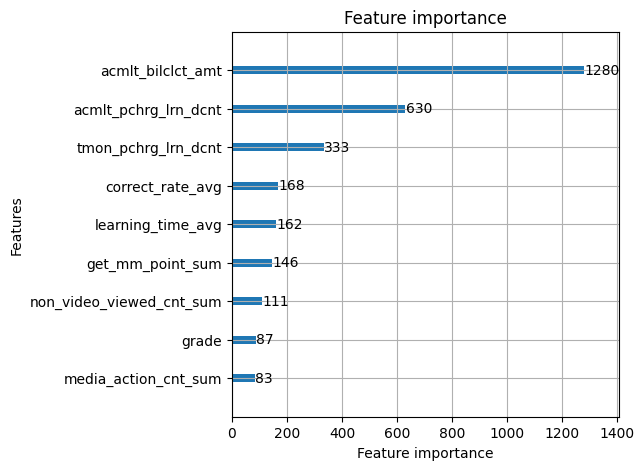

In [55]:
# 영향도 (주요 변수 시각화)
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
plot_importance(lgbm_model, ax=ax)

#### 실습 : 학년 별로 이탈 예측 모델을 구성해본 뒤, 성능 결과를 확인해 보자

In [59]:
# 데이터 읽어오기
import pandas as pd
# 학습 데이터, 레이블 (label) 분리
# 데이터 읽어오기
churn_data = pd.read_csv('./data/churn_data.csv')
churn_data = churn_data.fillna(0)
churn_data = churn_data.drop(columns= ['number'])
churn_data.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False


In [60]:
# 학년 치환 (숫자로)
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_data['grade'] = churn_data['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn_data.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False,1


In [74]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [75]:
# 모델 구성
def churn_model(grade_df, grade_name = '1'):

    X = grade_df[[
        'tmon_pchrg_lrn_dcnt', 
        'acmlt_pchrg_lrn_dcnt', 
        'acmlt_bilclct_amt', 
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum', 
        'non_video_viewed_cnt_sum',
        'get_mm_point_sum']]

    y = grade_df['label']

    # Train, Test 데이터 분리 (이탈 미이탈 값 확인)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("[Train] {} 학년, 이탈 : {}, 미이탈 : {}".format(grade_name, y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
    print("[Test] {}학년, 이탈 : {}, 미이탈 : {}".format(grade_name, y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

    # LGBM 모델 학습
    lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model.fit(X_train, y_train)

    # 예측 결과
    y_pred = lgbm_model.predict(X_test)
    y_pred = list(y_pred)
    print("[Predict] {} 학년, 이탈: {}, 미이탈: {}".format(grade_name, y_pred.count(1), y_pred.count(0)))
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Precision, recall, f1
    pre, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print("{} 학년, acc: {}, precision: {}, recall: {}, f1: {}".format(grade_name, acc, pre, re, f1))

    # 주요 변수 시각화
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(lgbm_model, ax=ax)
    plt.title("{}학년 Feature Importance".format(grade_name))
    plt.show()
    return

    # ! pip install koreanize-matplotlib -> 한글폰트 안 나올 때

[Train] 1 학년, 이탈 : 139, 미이탈 : 7861
[Test] 1학년, 이탈 : 35, 미이탈 : 1965
[Predict] 1 학년, 이탈: 28, 미이탈: 1972
1 학년, acc: 0.9935, precision: 0.8928571428571429, recall: 0.7142857142857143, f1: 0.7936507936507937


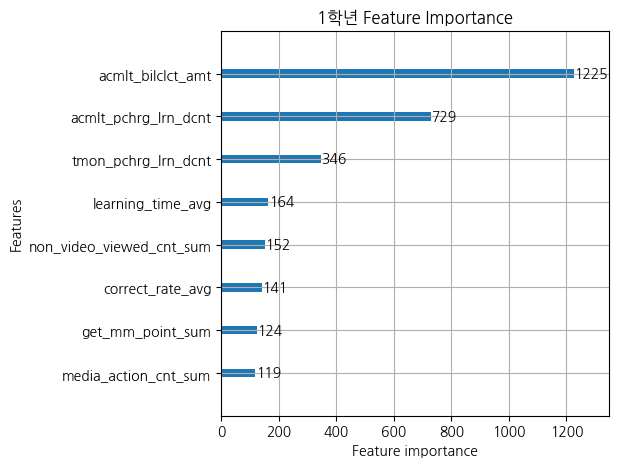

[Train] 2 학년, 이탈 : 98, 미이탈 : 7902
[Test] 2학년, 이탈 : 22, 미이탈 : 1978
[Predict] 2 학년, 이탈: 15, 미이탈: 1985
2 학년, acc: 0.9935, precision: 0.8, recall: 0.5454545454545454, f1: 0.6486486486486486


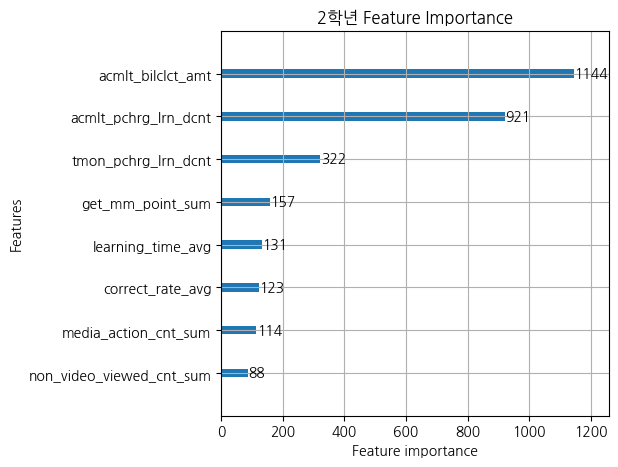

[Train] 3 학년, 이탈 : 86, 미이탈 : 7914
[Test] 3학년, 이탈 : 21, 미이탈 : 1979
[Predict] 3 학년, 이탈: 20, 미이탈: 1980
3 학년, acc: 0.9935, precision: 0.7, recall: 0.6666666666666666, f1: 0.6829268292682926


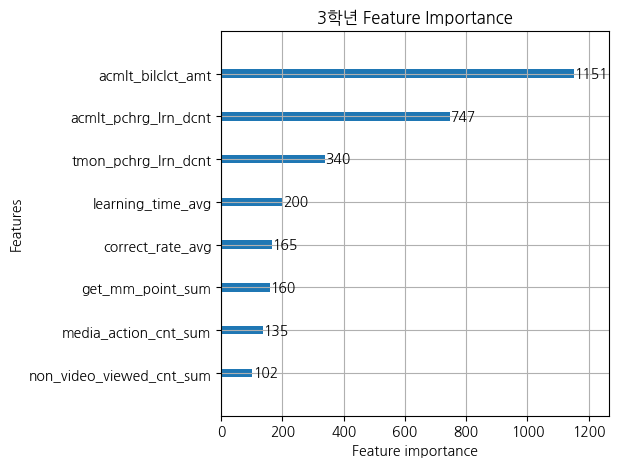

[Train] 4 학년, 이탈 : 120, 미이탈 : 7880
[Test] 4학년, 이탈 : 32, 미이탈 : 1968
[Predict] 4 학년, 이탈: 32, 미이탈: 1968
4 학년, acc: 0.991, precision: 0.71875, recall: 0.71875, f1: 0.71875


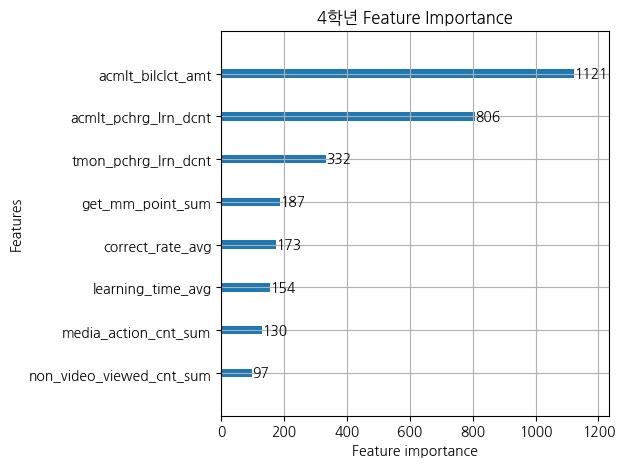

[Train] 5 학년, 이탈 : 126, 미이탈 : 7874
[Test] 5학년, 이탈 : 32, 미이탈 : 1968
[Predict] 5 학년, 이탈: 21, 미이탈: 1979
5 학년, acc: 0.9895, precision: 0.7619047619047619, recall: 0.5, f1: 0.6037735849056604


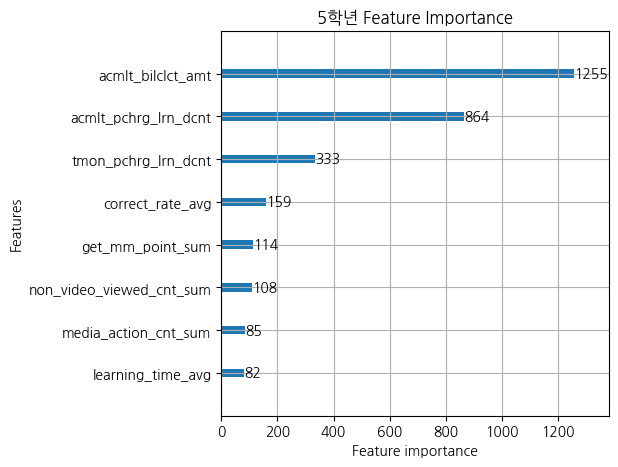

[Train] 6 학년, 이탈 : 169, 미이탈 : 7831
[Test] 6학년, 이탈 : 52, 미이탈 : 1948
[Predict] 6 학년, 이탈: 45, 미이탈: 1955
6 학년, acc: 0.9845, precision: 0.7333333333333333, recall: 0.6346153846153846, f1: 0.6804123711340205


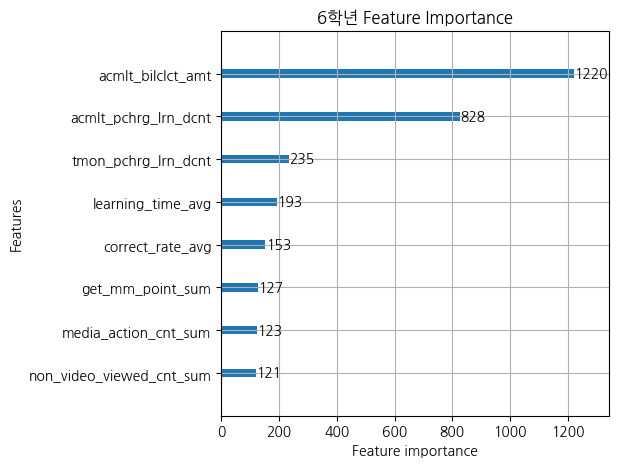

In [76]:
# 실행부 구성
for grade in range(1, 7):
    grade_df = churn_data[churn_data['grade'] == grade]
    churn_model(grade_df, grade_name = str(grade))

#### 4. 성능 지표 (Confusion Matrix) : Precision, Recall, F1 score

In [79]:
# 데이터 읽어오기
import pandas as pd
churn_data = pd.read_csv('./data/churn_data.csv')
churn_data = churn_data.fillna(0)
churn_data = churn_data.drop(columns= ['number'])
churn_data.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False


In [80]:
# 학년 치환 전처리, 1학년 데이터만 가져오기
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_data['grade'] = churn_data['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn_data = churn_data[churn_data['grade']==1]
churn_data.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False,1


In [81]:
# 필요 컬럼만 가져오기    
X = grade_df[[
        'tmon_pchrg_lrn_dcnt', 
        'acmlt_pchrg_lrn_dcnt', 
        'acmlt_bilclct_amt', 
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum', 
        'non_video_viewed_cnt_sum',
        'get_mm_point_sum']]

y = grade_df['label']


In [82]:
# 데이터 분할하기
# Train, Test 데이터 분리 (이탈 미이탈 값 확인)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("[Train] 이탈 : {}, 미이탈 : {}".format(y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
print("[Test] 이탈 : {}, 미이탈 : {}".format(y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

[Train] 이탈 : 169, 미이탈 : 7831
[Test] 이탈 : 52, 미이탈 : 1948


In [83]:
# LGBM 모델 학습
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=0, verbose=-1)

In [84]:
# 예측
y_pred = lgbm_model.predict(X_test)
y_pred = list(y_pred)
print("[Predict] 이탈: {}, 미이탈: {}".format(y_pred.count(1), y_pred.count(0)))

[Predict] 이탈: 45, 미이탈: 1955


In [85]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9845

In [86]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.7333333333333333, 0.6346153846153846, 0.6804123711340205, None)

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
# [[tn, fp
#   fn, tp]]
# array([[1936,   12],
#        [  19,   33]]

array([[1936,   12],
       [  19,   33]], dtype=int64)

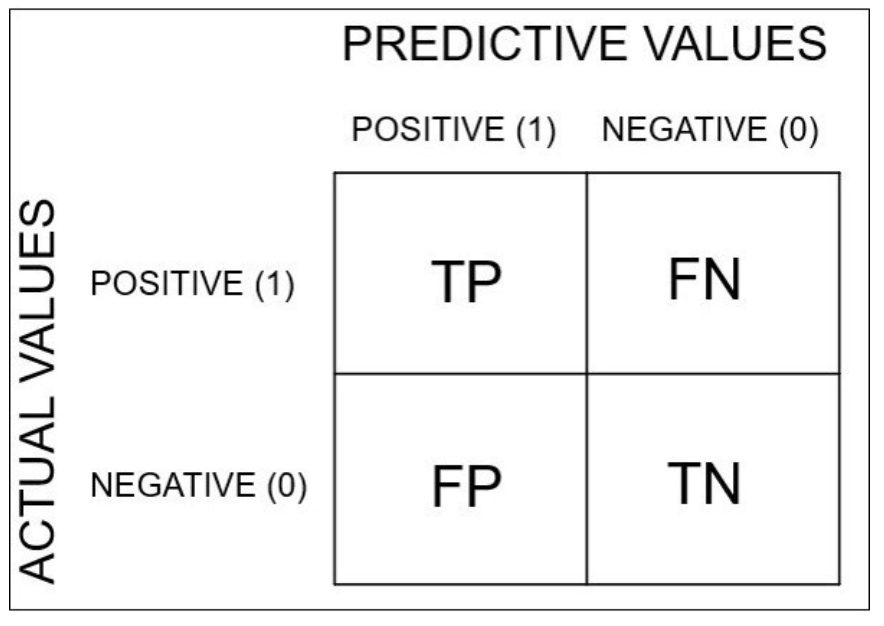

In [87]:
# Confusion Matrix 양식
from IPython.display import Image
Image('./data/confusion_matrix.png')

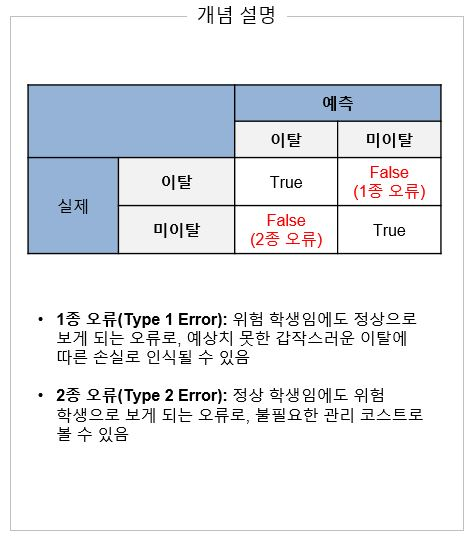

In [78]:
from IPython.display import Image
Image('./data/error_type.jpg')

In [92]:
# cmtx 구성
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels = [1, 0]),
    index = ['실제: 이탈 (1)', '실제: 미이탈(0)'],
    columns = ['예측: 이탈 (1)', '예측: 미이탈(0)']
)
cmtx

,예측: 이탈 (1),예측: 미이탈(0)
실제: 이탈 (1),33,19
실제: 미이탈(0),12,1936


<AxesSubplot: title={'center': 'Confusion Matrix'}>

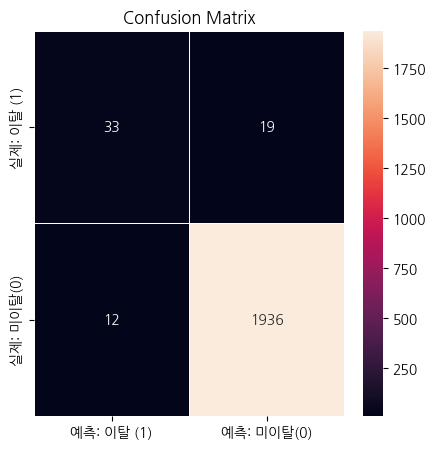

In [93]:
# cmtx 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib # 한글 폰트 안 깨지고 사용 가능
# pip install koreanize-matplotlib

plt.figure(figsize = (5, 5))
plt.title('Confusion Matrix')
sns.heatmap(cmtx, annot=True, fmt=".0f", linewidth=.5)

In [98]:
# Precision
# TP / (TP+FP) : TP(0, 0), FP(1, 0)
precision = cmtx.iloc[0, 0] / (cmtx.iloc[0, 0] + cmtx.iloc[1, 0])

# Recall 
# TP /(TP+FN) : TP(0, 0), FN (0, 1)
recall = cmtx.iloc[0, 0] / (cmtx.iloc[0, 0] + cmtx.iloc[0, 1])

# F1 Score
# 2 * (Precision * Recall)/(Precision + Recall)
f1 = 2 * (precision * recall)/(precision + recall)

print("precision: {}, recall: {}, f1: {}".format(precision, recall, f1))

precision: 0.7333333333333333, recall: 0.6346153846153846, f1: 0.6804123711340205
